In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.signal import decimate
from oasis.functions import deconvolve

%load_ext autoreload
%autoreload 2

print('done')

done


/home/dhh/OASIS/oasis/functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


In [3]:
dg_filepath = '/mnt/f/dhh-soltesz-lab/DG-data'
dset        = 'darian_ctrl.pkl'
full_fpath  = dg_filepath + '/' + dset

data = pickle.load( open( full_fpath, 'rb'), encoding='latin1')

In [10]:
nid = 'nd100'
print(list(data.keys()))
print(data[nid][0].keys())

mGC_traces = data[nid][0]['mGC']
ab_traces  = data[nid][0]['abGC']
combined_traces = np.concatenate((mGC_traces, ab_traces))

imaging_times = data[nid][0]['imaging_times']
dt = imaging_times[1] - imaging_times[0]

print(combined_traces[0,:])
print(mGC_traces.shape, ab_traces.shape, combined_traces.shape)
print(dt)

['nd102', 'nd99', 'nd100', 'nd101']
dict_keys(['mGC', 'abGC', 'imaging_times'])
[        nan         nan         nan ... -0.04296782 -0.0633244
 -0.05492888]
(646, 11000) (23, 11000) (669, 11000)
0.05455041367397036


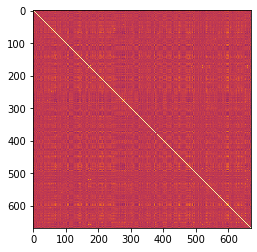

In [11]:
for (i,trace) in enumerate(combined_traces):
    if np.isnan(trace).any():
        nan_locs = np.argwhere(np.isnan(trace)).reshape(-1,)
        combined_traces[i,nan_locs] = 0.0

plt.figure()
plt.imshow(np.corrcoef(combined_traces), vmin=-1., vmax=1., cmap='inferno')
plt.show()

/home/dhh/OASIS/oasis/functions.py:815: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[1:])[0]


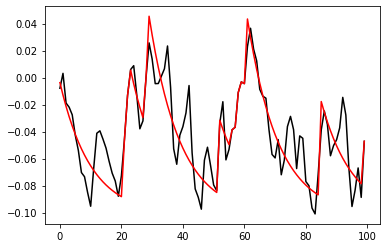

In [12]:
deconvolved_traces = []
for trace in combined_traces:
    c, s, b, g, lam = deconvolve(trace, penalty=1, b_nonneg=False)
    deconvolved_traces.append(c+b)
deconvolved_traces = np.asarray(deconvolved_traces, dtype='float32')

plt.figure()
plt.plot(combined_traces[0,100:200], color='k')
plt.plot(deconvolved_traces[0,100:200], color='r')

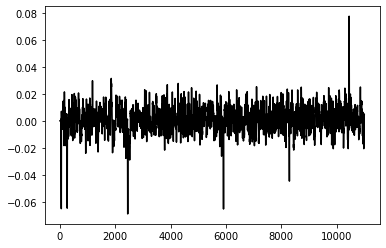

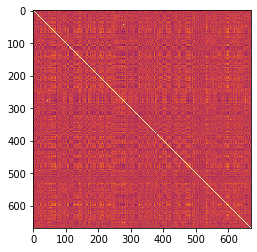

In [14]:
plt.figure()
plt.plot(deconvolved_traces.mean(axis=0), color='k')
plt.show()

plt.figure()
plt.imshow(np.corrcoef(deconvolved_traces[:,1000:2500]), vmin=-1., vmax=1., cmap='inferno')
plt.show()

In [92]:
np.savez('../../data/control_nd101_0.npz', traces=deconvolved_traces, mature=mGC_traces.shape[0], ab=ab_traces.shape[0])        

(802, 8334)


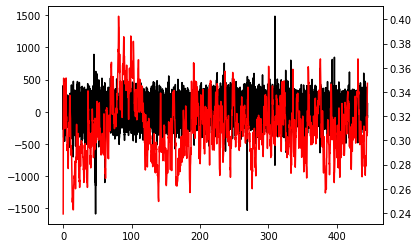

In [93]:
# dg201 - 1450, 3000; 3700,4800
# dg202 - 500, 1500; 
# dg204 - 0, 1000; 1000,2000

ca_FPS  = 4.5
lfp_FPS = 2000.
print(final_traces.shape)
ca_start, ca_stop = 0, 2000
ca_start_time, ca_stop_time = ca_start/ca_FPS, ca_stop/ca_FPS
lfp_start, lfp_stop = int(ca_start_time*lfp_FPS), int(ca_stop_time*lfp_FPS) 


fig, ax = plt.subplots()
try:
    ax.plot(np.arange(ca_start_time,ca_stop_time,1./lfp_FPS)[:],lfp_all[lfp_start:lfp_stop], color='k')
except:
    ax.plot(np.arange(ca_start_time,ca_stop_time,1./lfp_FPS)[1:],lfp_all[lfp_start:lfp_stop], color='k')
ax2 = ax.twinx()
try:
    ax2.plot(np.arange(ca_start_time,ca_stop_time,1./ca_FPS)[:],np.mean(final_traces,axis=0)[ca_start:ca_stop], color='r')
except:
    ax2.plot(np.arange(ca_start_time,ca_stop_time,1./ca_FPS)[1:],np.mean(final_traces,axis=0)[ca_start:ca_stop], color='r')


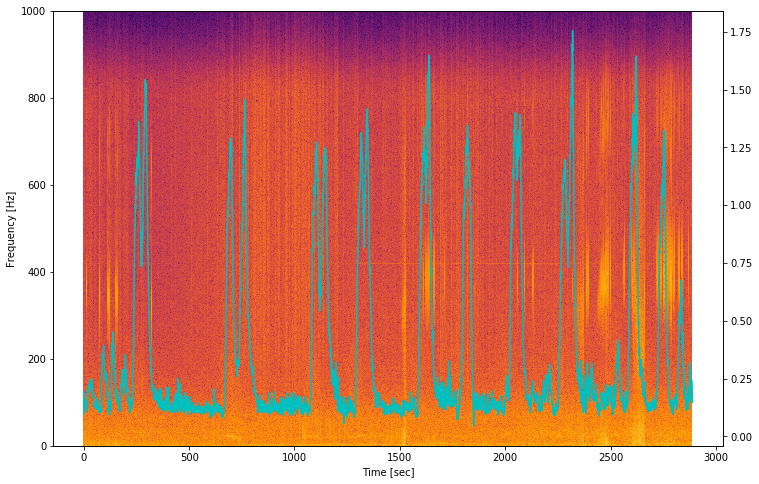

In [54]:
from scipy.signal import spectrogram, kaiser, kaiserord
from scipy.signal import butter, buttord, lfilter, filtfilt
from scipy.signal import freqs

lfp_chunk = lfp_all[lfp_start:lfp_stop]

f, t, Sxx = spectrogram(np.asarray(lfp_chunk), lfp_FPS, nperseg=4096)
fig, ax = plt.subplots(figsize=(12,8))
ax.pcolormesh(t, f, np.log10(Sxx), cmap='inferno')
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
ax2 = ax.twinx()
ax2.plot(np.arange(ca_start_time,ca_stop_time,1./ca_FPS)[ca_start:ca_stop],np.mean(final_traces,axis=0)[ca_start:ca_stop], color='c')
plt.show()

